In [1]:
#importamos las librerias necesarias
import pandas as pd
import warnings
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from scipy.stats import variation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc

In [2]:
# =====================
# 2. Cargar datasets
# =====================
path = "./Dataset/"

df= pd.read_csv(path + "strava_full_data.csv")


In [3]:
df.head()

,Unnamed: 0,average_speed,max_speed,average_heartrate,max_heartrate,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
0,0,3.142,5.3,NaN,NaN,11443.2,1:03:50,1:00:42,73.0,115.0,Run,2020-01-18T12:00:36,12
1,1,3.410,7.4,NaN,NaN,9486.0,0:48:51,0:46:22,36.1,96.9,Run,2020-01-17T19:00:58,13
2,2,3.273,4.0,NaN,NaN,8854.8,0:45:32,0:45:05,16.0,117.2,Run,2020-01-13T18:37:29,3
3,3,3.259,4.0,NaN,NaN,7717.5,0:39:35,0:39:28,10.0,131.6,Run,2020-01-10T18:36:52,2
4,4,3.222,4.0,NaN,NaN,7659.5,0:41:33,0:39:37,12.0,107.4,Run,2020-01-08T18:37:24,17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1121 non-null   int64  
 1   average_speed         1121 non-null   float64
 2   max_speed             1121 non-null   float64
 3   average_heartrate     190 non-null    float64
 4   max_heartrate         190 non-null    float64
 5   distance              1121 non-null   float64
 6   elapsed_time          1120 non-null   object 
 7   moving_time           1120 non-null   object 
 8   total_elevation_gain  1121 non-null   float64
 9   elev_high             1072 non-null   float64
 10  type                  1121 non-null   object 
 11  start_date_local      1121 non-null   object 
 12  kudos_count           1121 non-null   int64  
dtypes: float64(7), int64(2), object(4)
memory usage: 114.0+ KB


In [5]:
df = df.drop(columns=['average_heartrate', 'max_heartrate'])


In [6]:
df.isna().sum()

Unnamed: 0               0
average_speed            0
max_speed                0
distance                 0
elapsed_time             1
moving_time              1
total_elevation_gain     0
elev_high               49
type                     0
start_date_local         0
kudos_count              0
dtype: int64

In [7]:
df.describe()

,Unnamed: 0,average_speed,max_speed,distance,total_elevation_gain,elev_high,kudos_count
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1072.000000,1121.000000
mean,560.000000,3.029095,5.142908,8428.107315,240.820250,404.417071,5.365745
std,323.749131,1.082123,2.610386,9412.084936,1453.707497,1072.269702,5.302631
min,0.000000,0.000000,0.000000,0.000000,0.000000,-154.200000,0.000000
25%,280.000000,2.481000,3.900000,3866.900000,8.000000,97.550000,1.000000
50%,560.000000,3.061000,4.700000,7025.600000,31.000000,113.600000,4.000000
75%,840.000000,3.361000,5.900000,9920.800000,93.000000,225.175000,9.000000
max,1120.000000,6.373000,29.200000,121660.000000,28620.000000,12606.800000,32.000000


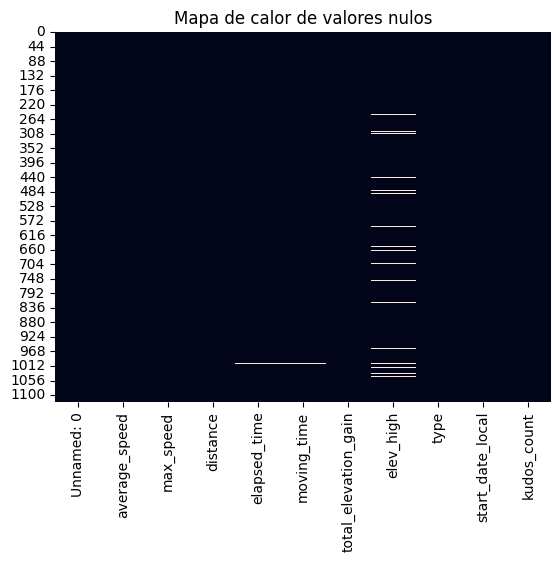

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.isna(), cbar=False)
plt.title("Mapa de calor de valores nulos")
plt.show()

In [9]:
df['start_date_local'] = pd.to_datetime(df['start_date_local'])
df['elapsed_time'] = pd.to_timedelta(df['elapsed_time']).dt.total_seconds()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            1121 non-null   int64         
 1   average_speed         1121 non-null   float64       
 2   max_speed             1121 non-null   float64       
 3   distance              1121 non-null   float64       
 4   elapsed_time          1120 non-null   float64       
 5   moving_time           1120 non-null   object        
 6   total_elevation_gain  1121 non-null   float64       
 7   elev_high             1072 non-null   float64       
 8   type                  1121 non-null   object        
 9   start_date_local      1121 non-null   datetime64[ns]
 10  kudos_count           1121 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 96.5+ KB


In [11]:
df.head()

,Unnamed: 0,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,type,start_date_local,kudos_count
0,0,3.142,5.3,11443.2,3830.0,1:00:42,73.0,115.0,Run,2020-01-18 12:00:36,12
1,1,3.410,7.4,9486.0,2931.0,0:46:22,36.1,96.9,Run,2020-01-17 19:00:58,13
2,2,3.273,4.0,8854.8,2732.0,0:45:05,16.0,117.2,Run,2020-01-13 18:37:29,3
3,3,3.259,4.0,7717.5,2375.0,0:39:28,10.0,131.6,Run,2020-01-10 18:36:52,2
4,4,3.222,4.0,7659.5,2493.0,0:39:37,12.0,107.4,Run,2020-01-08 18:37:24,17


<Axes: xlabel='type'>

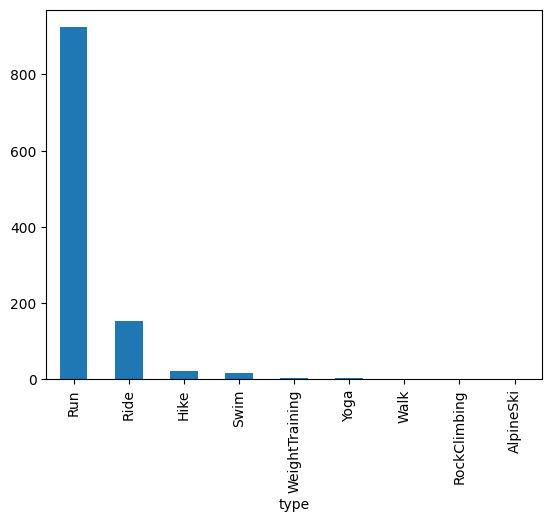

In [12]:
df['type'].value_counts().plot(kind='bar')


In [13]:
df.groupby('type')['elev_high'].apply(lambda x: x.isna().sum())


type
AlpineSki          0
Hike               4
Ride               4
RockClimbing       1
Run               18
Swim              17
Walk               1
WeightTraining     2
Yoga               2
Name: elev_high, dtype: int64

In [14]:
df = df[df['type'] == 'Run']


In [15]:
df['type'].value_counts()


type
Run    924
Name: count, dtype: int64

In [16]:
df = df.drop(columns=['type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            924 non-null    int64         
 1   average_speed         924 non-null    float64       
 2   max_speed             924 non-null    float64       
 3   distance              924 non-null    float64       
 4   elapsed_time          923 non-null    float64       
 5   moving_time           923 non-null    object        
 6   total_elevation_gain  924 non-null    float64       
 7   elev_high             906 non-null    float64       
 8   start_date_local      924 non-null    datetime64[ns]
 9   kudos_count           924 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 79.4+ KB


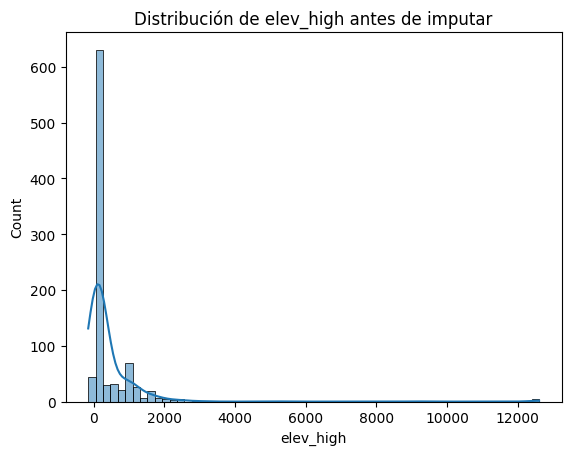

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['elev_high'], kde=True)
plt.title('Distribución de elev_high antes de imputar')
plt.show()


In [18]:
mediana_elev = df['elev_high'].median()
print("Mediana de elev_high:", mediana_elev)

df['elev_high'].fillna(mediana_elev, inplace=True)


Mediana de elev_high: 117.4


C:\Users\wladi\AppData\Local\Temp\ipykernel_17380\152875631.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['elev_high'].fillna(mediana_elev, inplace=True)


In [19]:
print("Antes:", df.shape)
df = df.dropna()
print("Después:", df.shape)
df.isna().sum()


Antes: (924, 10)
Después: (923, 10)


Unnamed: 0              0
average_speed           0
max_speed               0
distance                0
elapsed_time            0
moving_time             0
total_elevation_gain    0
elev_high               0
start_date_local        0
kudos_count             0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 1120
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Unnamed: 0            923 non-null    int64         
 1   average_speed         923 non-null    float64       
 2   max_speed             923 non-null    float64       
 3   distance              923 non-null    float64       
 4   elapsed_time          923 non-null    float64       
 5   moving_time           923 non-null    object        
 6   total_elevation_gain  923 non-null    float64       
 7   elev_high             923 non-null    float64       
 8   start_date_local      923 non-null    datetime64[ns]
 9   kudos_count           923 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 79.3+ KB


In [21]:
df['moving_time'].unique()

array(['1:00:42', '0:46:22', '0:45:05', '0:39:28', '0:39:37', '0:55:12',
       '0:52:13', '0:46:57', '0:11:18', '0:40:53', '0:52:19', '0:11:45',
       '1:59:13', '0:52:50', '3:28:24', '0:33:22', '2:02:03', '0:29:29',
       '0:55:52', '0:32:34', '0:52:12', '0:28:40', '1:30:15', '0:52:20',
       '1:03:42', '0:53:09', '0:31:45', '0:03:13', '0:48:20', '0:19:12',
       '0:33:41', '0:54:22', '0:36:50', '0:32:20', '1:08:31', '0:48:21',
       '0:50:45', '0:48:50', '0:49:40', '0:49:17', '0:12:53', '0:08:05',
       '0:27:01', '0:38:25', '0:37:37', '0:47:35', '0:44:08', '0:33:04',
       '1:16:31', '1:26:13', '0:46:58', '0:38:02', '0:52:07', '0:40:15',
       '0:44:35', '0:36:55', '0:49:01', '0:39:24', '0:57:16', '0:44:27',
       '0:10:53', '1:08:38', '0:32:05', '0:29:30', '0:55:13', '0:35:06',
       '0:33:45', '0:51:54', '0:44:30', '0:36:18', '0:33:44', '0:36:20',
       '0:40:36', '0:55:23', '0:31:07', '0:19:59', '0:28:06', '12:03:23',
       '14:58:14', '0:29:47', '0:26:32', '0:37:18'

In [22]:
df['moving_time'] = pd.to_timedelta(df['moving_time'], errors='coerce')

In [23]:
df['moving_time_min'] = df['moving_time'].dt.total_seconds() / 60

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 923 entries, 0 to 1120
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   Unnamed: 0            923 non-null    int64          
 1   average_speed         923 non-null    float64        
 2   max_speed             923 non-null    float64        
 3   distance              923 non-null    float64        
 4   elapsed_time          923 non-null    float64        
 5   moving_time           923 non-null    timedelta64[ns]
 6   total_elevation_gain  923 non-null    float64        
 7   elev_high             923 non-null    float64        
 8   start_date_local      923 non-null    datetime64[ns] 
 9   kudos_count           923 non-null    int64          
 10  moving_time_min       923 non-null    float64        
dtypes: datetime64[ns](1), float64(7), int64(2), timedelta64[ns](1)
memory usage: 86.5 KB


In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols

Index(['Unnamed: 0', 'average_speed', 'max_speed', 'distance', 'elapsed_time',
       'total_elevation_gain', 'elev_high', 'kudos_count', 'moving_time_min'],
      dtype='object')

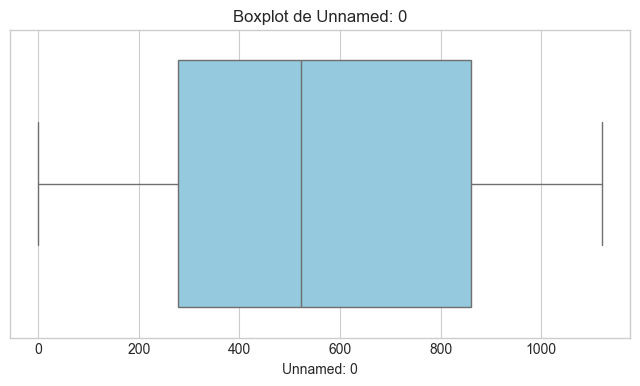

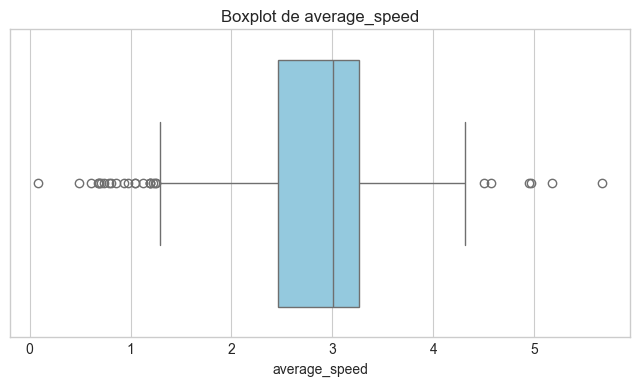

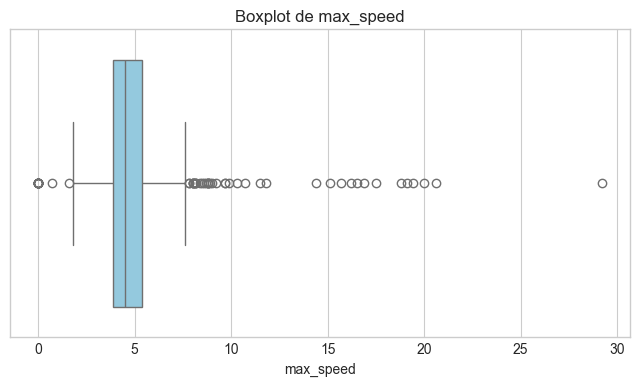

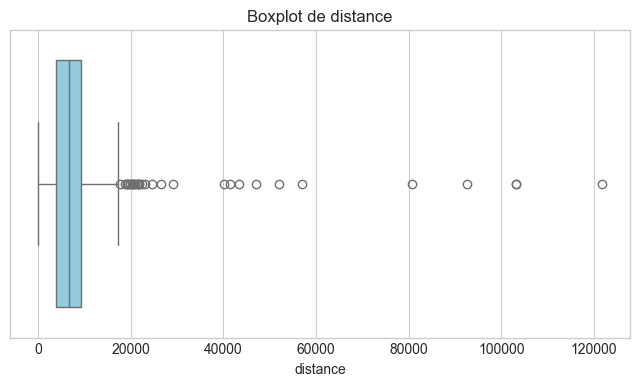

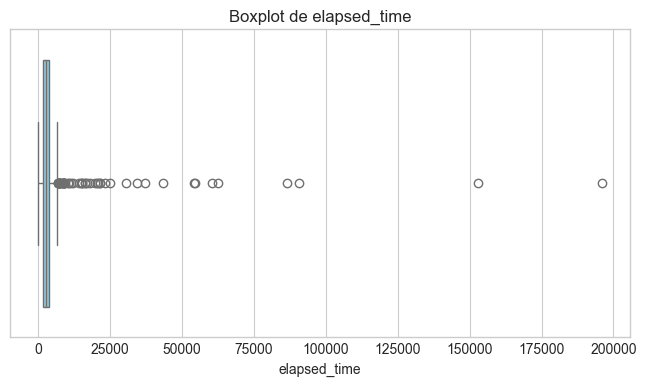

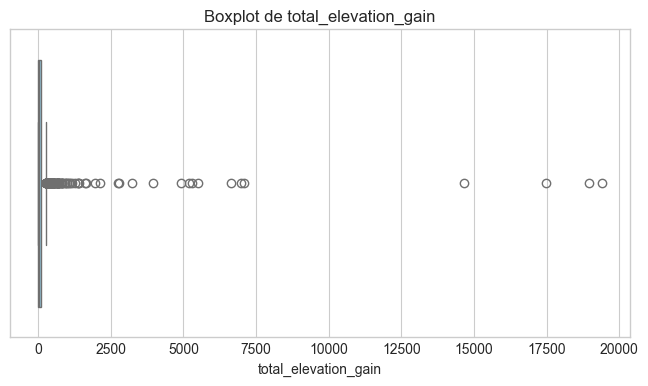

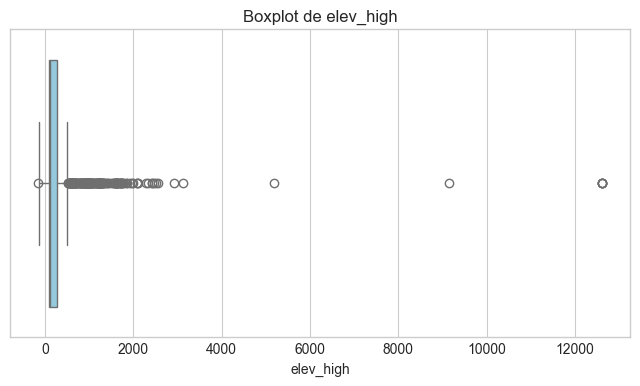

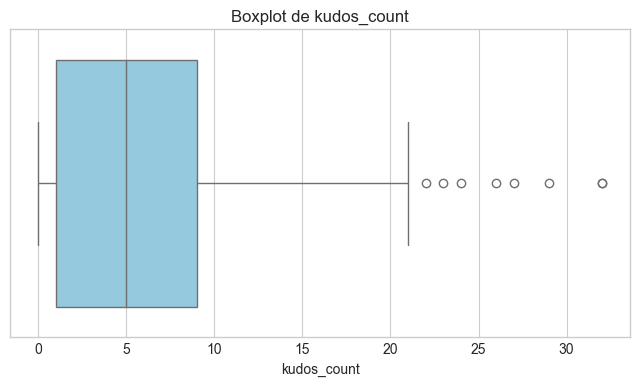

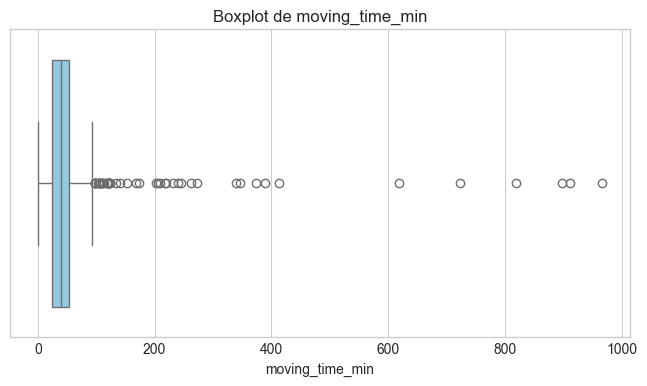

In [26]:
plt.style.use('seaborn-v0_8-whitegrid')

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()


In [27]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} outliers")


Unnamed: 0: 0 outliers
average_speed: 28 outliers
max_speed: 60 outliers
distance: 32 outliers
elapsed_time: 51 outliers
total_elevation_gain: 116 outliers
elev_high: 196 outliers
kudos_count: 8 outliers
moving_time_min: 49 outliers


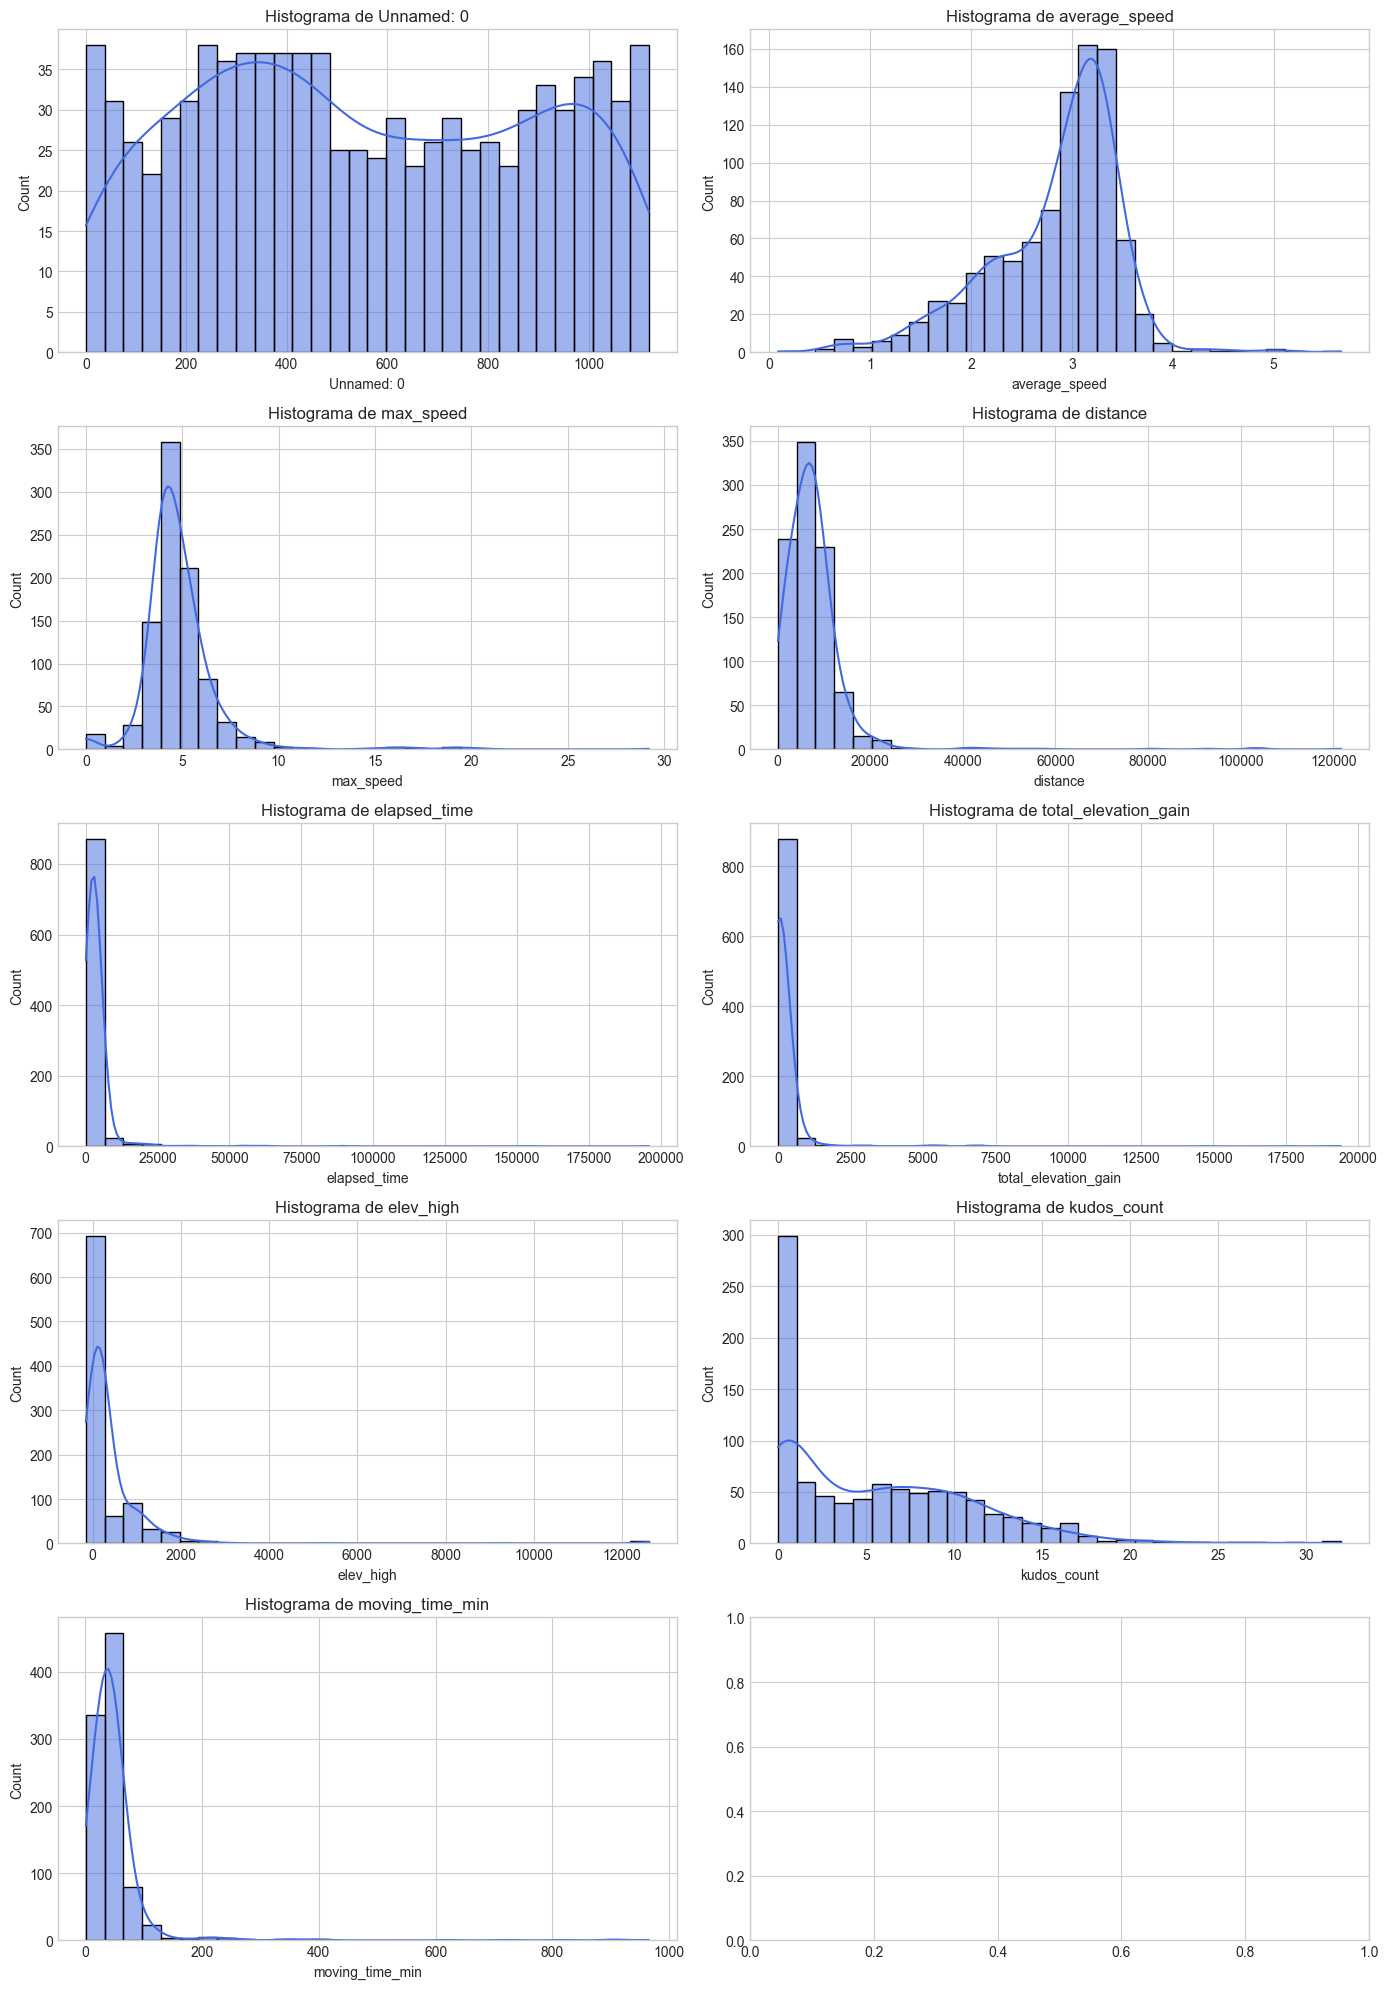

In [28]:
fig, axes = plt.subplots(nrows=len(numeric_cols)//2 + 1, ncols=2, figsize=(14, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color='royalblue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


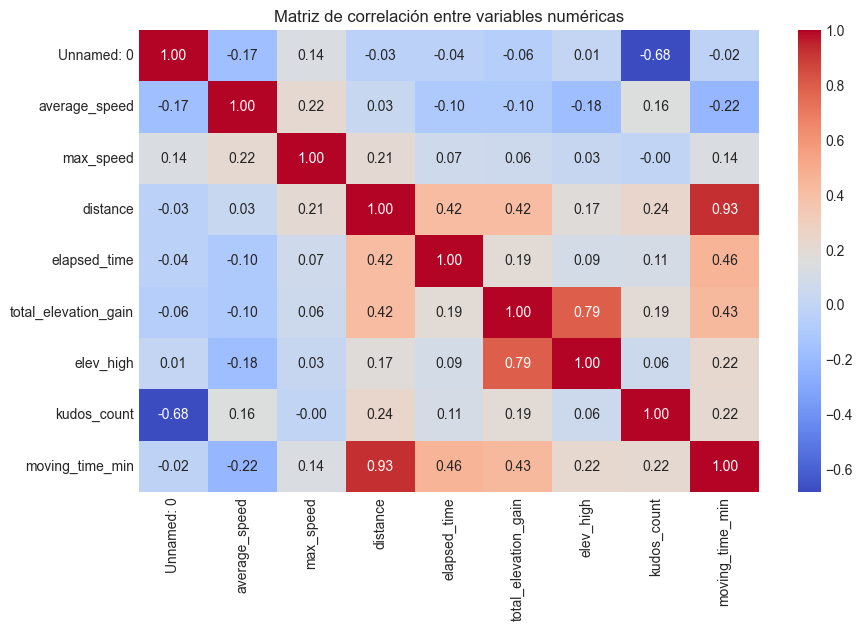

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


In [30]:
df = df.drop(columns=['Unnamed: 0'])

<Axes: xlabel='distance', ylabel='moving_time_min'>

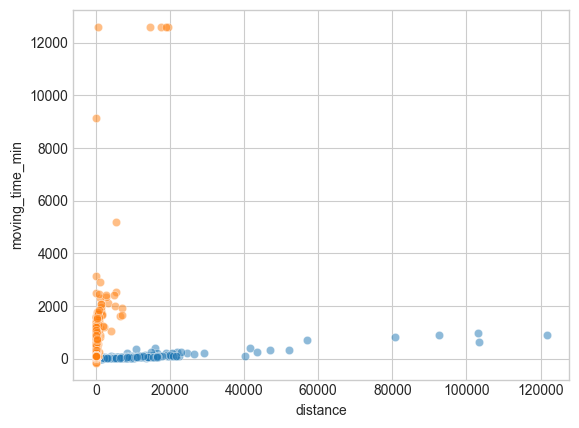

In [31]:
sns.scatterplot(data=df, x='distance', y='moving_time_min', alpha=0.5)
sns.scatterplot(data=df, x='total_elevation_gain', y='elev_high', alpha=0.5)

<Axes: xlabel='distance', ylabel='kudos_count'>

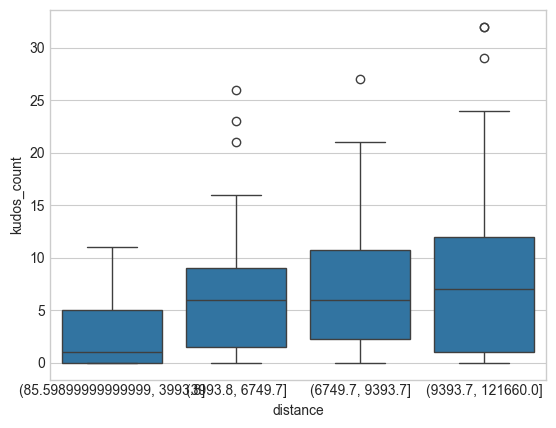

In [32]:
sns.boxplot(x=pd.qcut(df['distance'], 4), y=df['kudos_count'])


In [33]:
df = df[df['distance'] < 50000]
df = df[df['moving_time_min'] < 4000]
df = df[df['elev_high'] < 2000]

<Axes: xlabel='distance', ylabel='moving_time_min'>

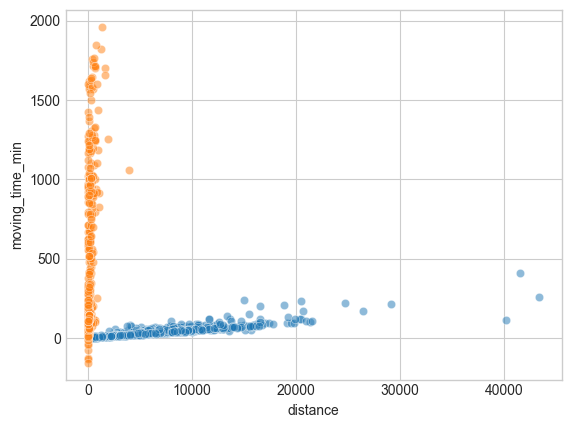

In [34]:
sns.scatterplot(data=df, x='distance', y='moving_time_min', alpha=0.5)
sns.scatterplot(data=df, x='total_elevation_gain', y='elev_high', alpha=0.5)

In [35]:
df.shape

(899, 10)

In [36]:
df['pace_min_per_km'] = df['moving_time_min'] / (df['distance'] / 1000)
df.head()

,average_speed,max_speed,distance,elapsed_time,moving_time,total_elevation_gain,elev_high,start_date_local,kudos_count,moving_time_min,pace_min_per_km
0,3.142,5.3,11443.2,3830.0,0 days 01:00:42,73.0,115.0,2020-01-18 12:00:36,12,60.700000,5.304460
1,3.410,7.4,9486.0,2931.0,0 days 00:46:22,36.1,96.9,2020-01-17 19:00:58,13,46.366667,4.887905
2,3.273,4.0,8854.8,2732.0,0 days 00:45:05,16.0,117.2,2020-01-13 18:37:29,3,45.083333,5.091401
3,3.259,4.0,7717.5,2375.0,0 days 00:39:28,10.0,131.6,2020-01-10 18:36:52,2,39.466667,5.113919
4,3.222,4.0,7659.5,2493.0,0 days 00:39:37,12.0,107.4,2020-01-08 18:37:24,17,39.616667,5.172226


In [37]:
Q1 = df['distance'].quantile(0.25)
Q3 = df['distance'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['distance'] >= lower) & (df['distance'] <= upper)]


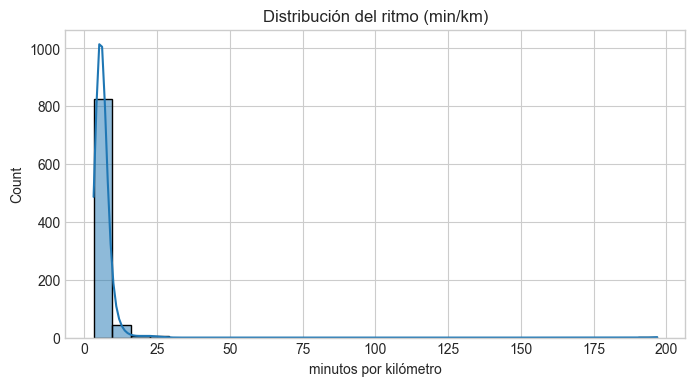

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.histplot(df['pace_min_per_km'], bins=30, kde=True)
plt.title('Distribución del ritmo (min/km)')
plt.xlabel('minutos por kilómetro')
plt.show()


In [39]:
df['pace_min_per_km'].describe()

count    878.000000
mean       6.476063
std        6.829101
min        3.221112
25%        5.108363
50%        5.518920
75%        6.625953
max      196.845794
Name: pace_min_per_km, dtype: float64

In [40]:
Q1 = df['pace_min_per_km'].quantile(0.25)
Q3 = df['pace_min_per_km'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['pace_min_per_km'] >= lower) & (df['pace_min_per_km'] <= upper)]

In [41]:
df = df[df['pace_min_per_km'] <= 15]

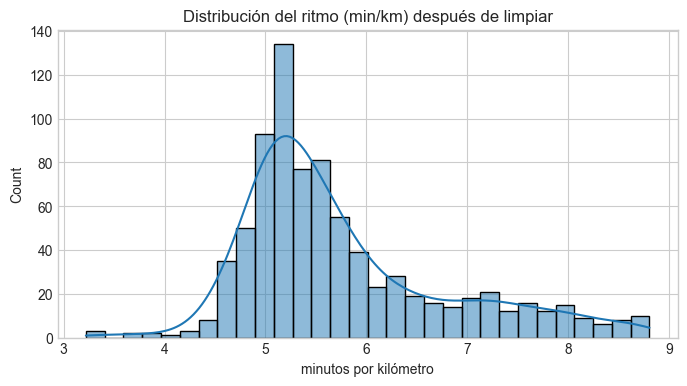

In [42]:
plt.figure(figsize=(8,4))
sns.histplot(df['pace_min_per_km'], bins=30, kde=True)
plt.title('Distribución del ritmo (min/km) después de limpiar')
plt.xlabel('minutos por kilómetro')
plt.show()


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 810 entries, 0 to 1119
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   average_speed         810 non-null    float64        
 1   max_speed             810 non-null    float64        
 2   distance              810 non-null    float64        
 3   elapsed_time          810 non-null    float64        
 4   moving_time           810 non-null    timedelta64[ns]
 5   total_elevation_gain  810 non-null    float64        
 6   elev_high             810 non-null    float64        
 7   start_date_local      810 non-null    datetime64[ns] 
 8   kudos_count           810 non-null    int64          
 9   moving_time_min       810 non-null    float64        
 10  pace_min_per_km       810 non-null    float64        
dtypes: datetime64[ns](1), float64(8), int64(1), timedelta64[ns](1)
memory usage: 75.9 KB


In [44]:
def categorize_pace(pace):
    if pace < 4.5:
        return 'Rápido'
    elif pace <= 6.5:
        return 'Moderado'
    else:
        return 'Lento'

df['pace_category'] = df['pace_min_per_km'].apply(categorize_pace)


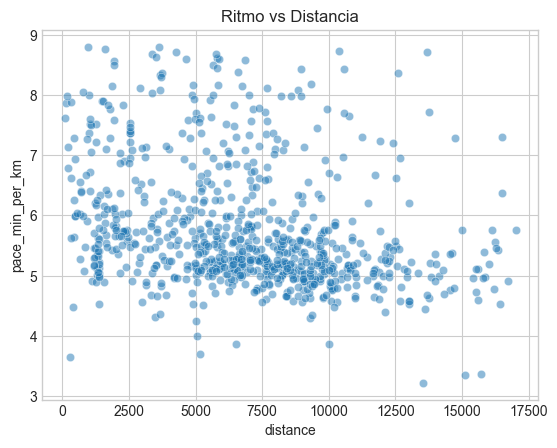

In [45]:
sns.scatterplot(data=df, x='distance', y='pace_min_per_km', alpha=0.5)
plt.title('Ritmo vs Distancia')
plt.show()


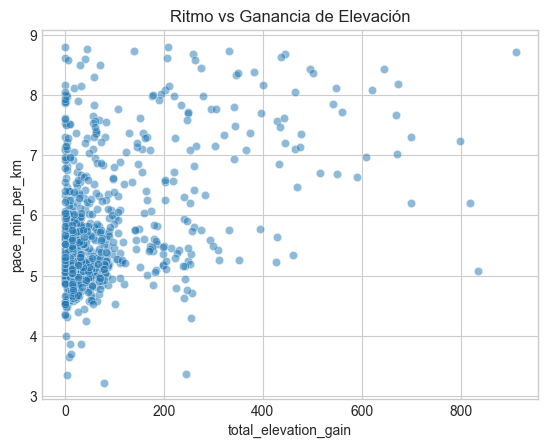

In [46]:
sns.scatterplot(data=df, x='total_elevation_gain', y='pace_min_per_km', alpha=0.5)
plt.title('Ritmo vs Ganancia de Elevación')
plt.show()


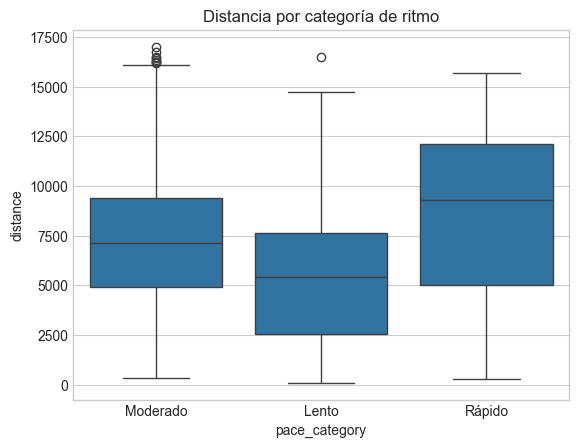

In [47]:
sns.boxplot(data=df, x='pace_category', y='distance')
plt.title('Distancia por categoría de ritmo')
plt.show()


In [48]:
df['elev_per_km'] = df['total_elevation_gain'] / (df['distance'] / 1000)

In [49]:
df['speed_kmh'] = (df['distance'] / 1000) / (df['moving_time_min'] / 60)

In [50]:
df['effort_index'] = df['speed_kmh'] / (1 + df['elev_per_km'])


In [51]:
def categorize_distance(d):
    if d < 5000:
        return 'Corta'
    elif d <= 10000:
        return 'Media'
    else:
        return 'Larga'

df['distance_category'] = df['distance'].apply(categorize_distance)


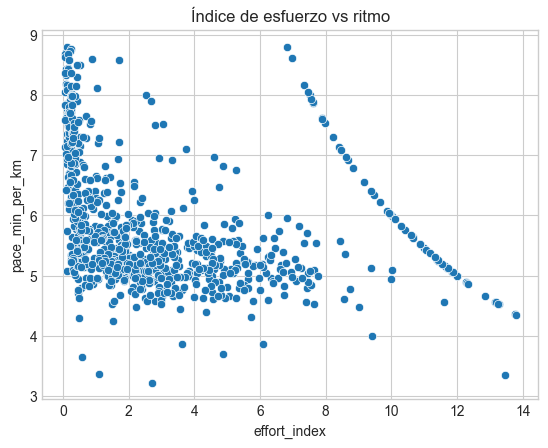

In [52]:
sns.scatterplot(data=df, x='effort_index', y='pace_min_per_km')
plt.title('Índice de esfuerzo vs ritmo')
plt.show()

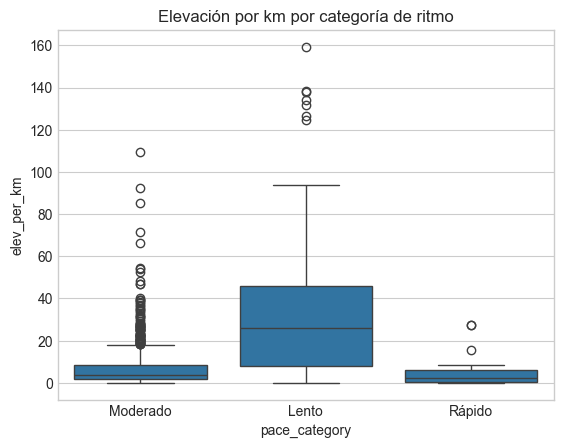

In [53]:
sns.boxplot(data=df, x='pace_category', y='elev_per_km')
plt.title('Elevación por km por categoría de ritmo')
plt.show()


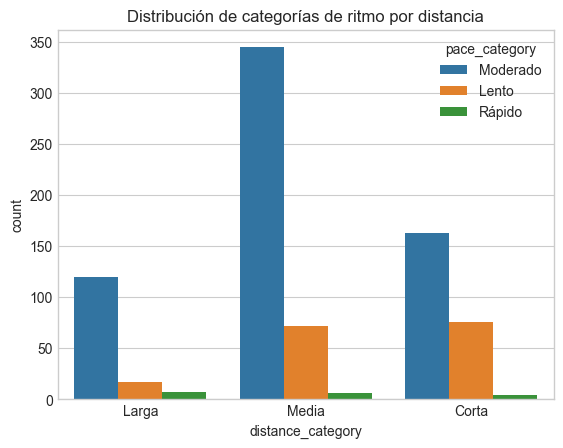

In [54]:
sns.countplot(data=df, x='distance_category', hue='pace_category')
plt.title('Distribución de categorías de ritmo por distancia')
plt.show()


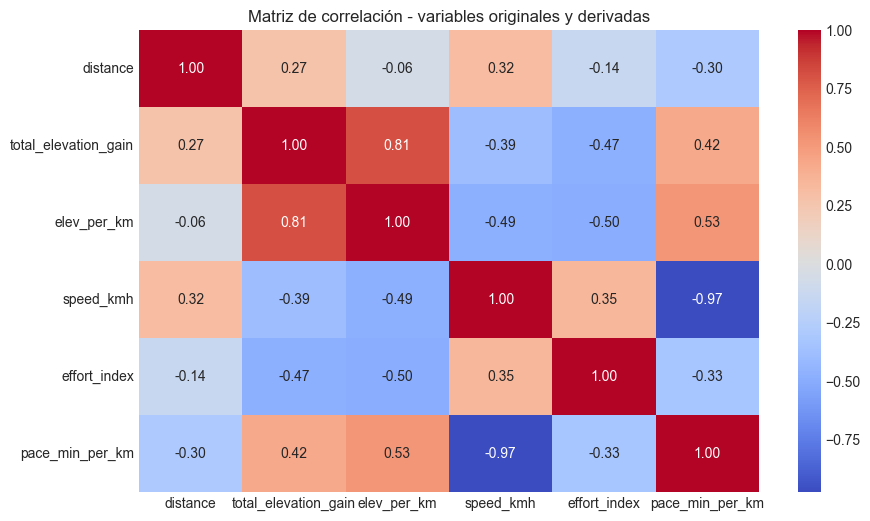

In [55]:
corr_matrix = df[['distance', 
                  'total_elevation_gain',
                  'elev_per_km',
                  'speed_kmh',
                  'effort_index',
                  'pace_min_per_km']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación - variables originales y derivadas')
plt.show()


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Features y target
X = df[['distance', 'total_elevation_gain', 'elev_per_km', 'effort_index']]
y = df['pace_min_per_km']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Métricas
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} min/km")
print(f"R²: {r2:.3f}")


MAE: 0.53 min/km
R²: 0.445


In [57]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print(coefficients)


                Feature  Coeficiente
3          effort_index    -0.053581
2           elev_per_km     0.004697
1  total_elevation_gain     0.002979
0              distance    -0.000117


In [58]:
df['effort_total'] = df['distance'] * df['elev_per_km']


In [59]:
df['elev_per_km_sq'] = df['elev_per_km'] ** 2


In [60]:
from sklearn.preprocessing import StandardScaler

features = ['distance', 'total_elevation_gain', 'elev_per_km', 
            'effort_index', 'effort_total', 'elev_per_km_sq']

X = df[features]
y = df['pace_min_per_km']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=300, 
    max_depth=None, 
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

print(f"Random Forest - MAE: {mae_rf:.2f} min/km")
print(f"Random Forest - R²: {r2_rf:.3f}")


Random Forest - MAE: 0.36 min/km
Random Forest - R²: 0.723


In [62]:
import pandas as pd
import numpy as np

importances = pd.DataFrame({
    'Feature': features,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances)


                Feature  Importance
3          effort_index    0.580453
0              distance    0.180818
5        elev_per_km_sq    0.084855
2           elev_per_km    0.082139
1  total_elevation_gain    0.036068
4          effort_total    0.035667


In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Definimos la grilla de parámetros
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_base = RandomForestRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,  # validación cruzada
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_scaled, y)

print(f"Mejores parámetros: {grid_search.best_params_}")
print(f"Mejor R² (CV): {grid_search.best_score_:.3f}")

# Entrenamos el modelo final con los mejores hiperparámetros
best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Mejores parámetros: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Mejor R² (CV): 0.650


In [64]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(best_rf, X_scaled, y, cv=5, scoring='r2', n_jobs=-1)
print(f"R² promedio: {np.mean(scores):.3f} ± {np.std(scores):.3f}")


R² promedio: 0.650 ± 0.078


In [65]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MAE: {mae_xgb:.2f} min/km")
print(f"XGBoost - R²: {r2_xgb:.3f}")


XGBoost - MAE: 0.27 min/km
XGBoost - R²: 0.838


In [66]:
from sklearn.ensemble import HistGradientBoostingRegressor

hgb = HistGradientBoostingRegressor(
    max_iter=300,
    learning_rate=0.05,
    max_depth=6,
    random_state=42
)

hgb.fit(X_train, y_train)
y_pred_hgb = hgb.predict(X_test)

mae_hgb = mean_absolute_error(y_test, y_pred_hgb)
r2_hgb = r2_score(y_test, y_pred_hgb)

print(f"HistGradientBoosting - MAE: {mae_hgb:.2f} min/km")
print(f"HistGradientBoosting - R²: {r2_hgb:.3f}")


HistGradientBoosting - MAE: 0.27 min/km
HistGradientBoosting - R²: 0.837


In [67]:
from sklearn.model_selection import train_test_split

X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Luego escalas solo X_train y X_test
X_train = scaler.fit_transform(X_train_df)
X_test = scaler.transform(X_test_df)


In [68]:
df_errors = pd.DataFrame({
    'y_true': y_test,
    'y_pred': y_pred_xgb,
    'distance': X_test_df['distance'],
    'elev_per_km': X_test_df['elev_per_km'],
    'effort_index': X_test_df['effort_index']
})


        y_true    y_pred  distance  elev_per_km  effort_index     error
969   7.056233  5.517010    1074.7    16.748860      0.479080  1.539223
972   8.301921  6.858066    3714.0    15.885837      0.428006  1.443855
420   7.905524  6.587186    1536.9     1.821849      2.689594  1.318338
733   7.515444  6.269248    6129.6     1.631428      3.033927  1.246196
671   7.644133  6.441249    5562.0    10.248112      0.697820  1.202884
567   8.492044  7.345444    5660.2    12.543726      0.521676  1.146600
1116  6.962686  5.861526   12677.1     0.875595      4.594471  1.101160
711   6.627534  5.563180   12538.6     7.736111      1.036290  1.064354
549   6.952778  6.021799    5666.8     1.941131      2.934125  0.930979
331   4.002818  4.872115    5063.1     0.592522      9.412389  0.869297


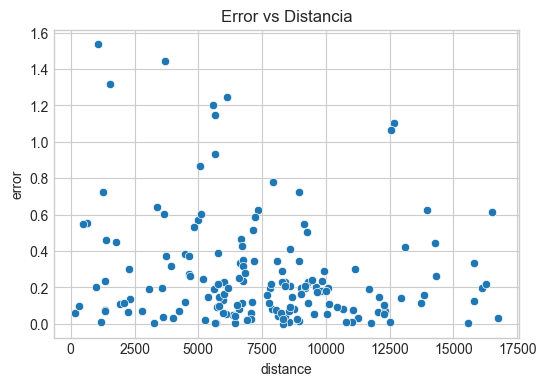

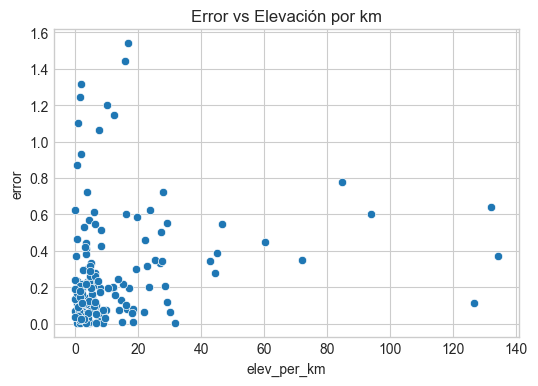

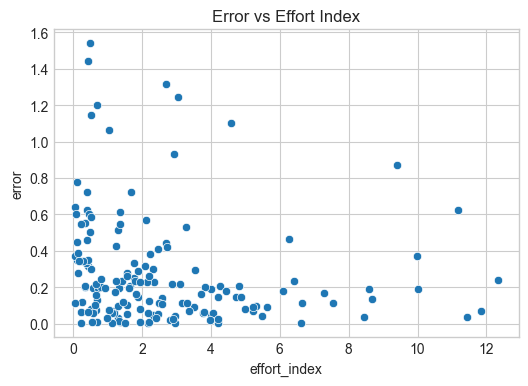

In [69]:
df_errors['error'] = abs(df_errors['y_true'] - df_errors['y_pred'])

# Top 10 mayores errores
print(df_errors.sort_values('error', ascending=False).head(10))

# Scatterplots de error
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_errors, x='distance', y='error')
plt.title('Error vs Distancia')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_errors, x='elev_per_km', y='error')
plt.title('Error vs Elevación por km')
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_errors, x='effort_index', y='error')
plt.title('Error vs Effort Index')
plt.show()



In [70]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({
    'feature': X_test_df.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print(importance_df)


                feature  importance
3          effort_index    2.902808
2           elev_per_km    0.187627
0              distance    0.144708
5        elev_per_km_sq    0.131373
1  total_elevation_gain    0.005170
4          effort_total    0.003323


In [75]:
import shap

# Explicador para modelos tipo tree
explainer = shap.TreeExplainer(xgb)  # o hgb
shap_values = explainer.shap_values(X_test)

# Grafico resumen global (qué variables influyen más)
shap.summary_plot(shap_values, X_test, feature_names=X_test_df.columns)

# Explicación individual para una predicción específica
shap.force_plot(
    explainer.expected_value,
    shap_values[0,:],
    X_test.iloc[0,:],
    matplotlib=True
)


ModuleNotFoundError: No module named 'shap'

In [72]:
import sys
print(sys.executable)


c:\Users\wladi\anaconda3\envs\forecast_gpu\python.exe
